In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Naive Bayes
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

%matplotlib inline

In [2]:
train = pd.read_csv('SalaryData_Train.csv')
test = pd.read_csv('SalaryData_Test.csv')

In [3]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


<AxesSubplot:>

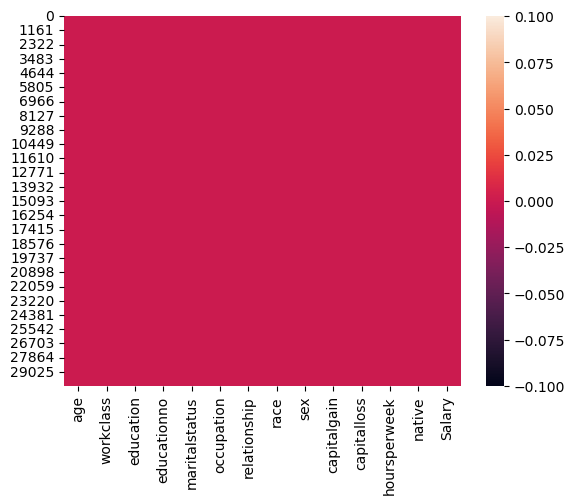

In [9]:
sns.heatmap(train.isnull())

In [10]:
#workclass
plt.figure(figsize=(12,5))
df1.workclass.value_counts().plot.bar(color='blue');

NameError: name 'df1' is not defined

<Figure size 1200x500 with 0 Axes>

In [ ]:
#maritial status
plt.figure(figsize=(12,5))
df1.maritalstatus.value_counts().plot.bar(color='orange');

In [ ]:
#occupation
plt.figure(figsize=(12,5))
df1.occupation.value_counts().plot.bar(color='yellow');

In [ ]:
#relationship
plt.figure(figsize=(12,5))
df1.relationship.value_counts().plot.bar(color='black');

In [ ]:
#race
plt.figure(figsize=(12,5))
df1.race.value_counts().plot.bar(color='green');

In [ ]:
#sex
plt.figure(figsize=(12,5))
df1.sex.value_counts().plot.bar(color='brown');

In [ ]:
#salary
plt.figure(figsize=(12,5))
df1.Salary.value_counts().plot.bar(color='grey');

In [ ]:
data1 = pd.concat([train,test], axis= 0).reset_index(drop=True)

data1.head()

In [ ]:

sns.heatmap(train.corr(), annot=True)

In [ ]:
sns.heatmap(test.corr(), annot=True)

In [ ]:
train1 = train.iloc[:,0:13]

train1 = pd.get_dummies(train1)
train1

In [ ]:
finaltrain = pd.concat([train1, train['Salary']], axis=1)
finaltrain

In [ ]:
test1 = test.iloc[:,0:13]

test1= pd.get_dummies(test1)
test1

In [ ]:
finaltest = pd.concat([test1, test['Salary']], axis=1)
finaltest

In [ ]:
X = finaltrain.values[:,0:102]
Y = finaltrain.values[:,102]

x = finaltest.values[:,0:102]
y = finaltest.values[:,102]

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [ ]:
classifier_mb = MB()
classifier_mb.fit(X,Y)
train_pred_m = classifier_mb.predict(X)
accuracy_train_m = np.mean(train_pred_m==Y)


test_pred_m = classifier_mb.predict(x)
accuracy_test_m= np.mean(test_pred_m==y)

In [ ]:
print('Training accuracy is:',accuracy_train_m,'\n','Testing accuracy is:',accuracy_test_m)

In [ ]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(X,Y) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(X)
accuracy_train_g = np.mean(train_pred_g==Y)

test_pred_g = classifier_gb.predict(x)
accuracy_test_g = np.mean(test_pred_g==y)



In [ ]:
print('Training accuracy is:',accuracy_train_g,'\n','Testing accuracy is:',accuracy_test_g)